In [4]:
import numpy as np
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt

In [3]:
raw = pd.DataFrame()

for year in range(2022, 2024):
    for month in range(1, 13):
        month = str(month).zfill(2)
        
        yellow_file_name = f'raw_taxi_data/yellow_tripdata_{year}-{month}.parquet'
        print(yellow_file_name)
        
        raw_yellow_partition = pd.DataFrame()  
        try:
            raw_yellow_partition = pq.read_table(yellow_file_name)
            raw_yellow_partition = raw_yellow_partition.to_pandas()[['tpep_pickup_datetime','tpep_dropoff_datetime',
                                                    'passenger_count','PULocationID','DOLocationID']]
        except Exception as e:
                print(f"Could not read file: {yellow_file_name}. Error: {e}")
                
        green_file_name = f'raw_taxi_data/green_tripdata_{year}-{month}.parquet'
        print(green_file_name)
        
        raw_green_partition = pd.DataFrame() 
        try:
            raw_green_partition = pq.read_table(green_file_name)
            raw_green_partition = raw_green_partition.to_pandas()[['lpep_pickup_datetime','lpep_dropoff_datetime',
                                                    'passenger_count','PULocationID','DOLocationID']]

            raw_green_partition.columns = raw_green_partition.columns.str.replace('lpep_pickup_datetime', 'tpep_pickup_datetime')
            raw_green_partition.columns = raw_green_partition.columns.str.replace('lpep_dropoff_datetime', 'tpep_dropoff_datetime')
        except Exception as e:
                print(f"Could not read file: {green_file_name}. Error: {e}")
        
        raw = pd.concat([raw, raw_yellow_partition, raw_green_partition], axis=0)

raw.shape

raw_taxi_data/yellow_tripdata_2022-01.parquet
raw_taxi_data/green_tripdata_2022-01.parquet
raw_taxi_data/yellow_tripdata_2022-02.parquet
raw_taxi_data/green_tripdata_2022-02.parquet
raw_taxi_data/yellow_tripdata_2022-03.parquet
raw_taxi_data/green_tripdata_2022-03.parquet
raw_taxi_data/yellow_tripdata_2022-04.parquet
raw_taxi_data/green_tripdata_2022-04.parquet
raw_taxi_data/yellow_tripdata_2022-05.parquet
raw_taxi_data/green_tripdata_2022-05.parquet
raw_taxi_data/yellow_tripdata_2022-06.parquet
raw_taxi_data/green_tripdata_2022-06.parquet
raw_taxi_data/yellow_tripdata_2022-07.parquet
raw_taxi_data/green_tripdata_2022-07.parquet
raw_taxi_data/yellow_tripdata_2022-08.parquet
raw_taxi_data/green_tripdata_2022-08.parquet
raw_taxi_data/yellow_tripdata_2022-09.parquet
raw_taxi_data/green_tripdata_2022-09.parquet
raw_taxi_data/yellow_tripdata_2022-10.parquet
raw_taxi_data/green_tripdata_2022-10.parquet
raw_taxi_data/yellow_tripdata_2022-11.parquet
raw_taxi_data/green_tripdata_2022-11.parquet

(79593786, 5)

In [4]:
raw

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,142,236
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,236,42
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,166,166
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,114,68
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,68,163
...,...,...,...,...,...
64210,2023-12-31 22:15:00,2023-12-31 22:35:00,NaN,97,37
64211,2023-12-31 23:17:00,2023-12-31 23:53:00,NaN,116,37
64212,2023-12-31 23:21:00,2023-12-31 23:33:00,NaN,65,80
64213,2023-12-31 23:15:00,2023-12-31 23:40:00,NaN,36,65


In [5]:
# clean duplicated rows
print('Number of duplicate (excluding original) rows is:', raw.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', raw[raw.duplicated(keep=False)].shape[0])
# Show duplicate row data that can be dropped
raw[raw.duplicated(keep=False)]

Number of duplicate (excluding original) rows is: 562638
Number of duplicate rows (including first) in the table is: 1125262


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID
154,2022-01-01 00:26:37,2022-01-01 00:39:35,1.0,132,265
155,2022-01-01 00:26:37,2022-01-01 00:39:35,1.0,132,265
521,2022-01-01 00:27:18,2022-01-01 00:40:50,1.0,152,48
522,2022-01-01 00:27:18,2022-01-01 00:40:50,1.0,152,48
523,2022-01-01 00:59:33,2022-01-01 01:14:09,4.0,50,265
...,...,...,...,...,...
58921,2023-12-31 18:53:33,2023-12-31 18:54:26,1.0,75,75
59095,2023-12-31 21:05:23,2023-12-31 21:06:40,1.0,166,166
59096,2023-12-31 21:05:23,2023-12-31 21:06:40,1.0,166,166
59257,2023-12-31 23:40:44,2023-12-31 23:41:22,1.0,41,41


In [6]:
raw = raw[~raw.duplicated(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], keep=False)]
print('Number of duplicate (excluding original) rows is:', raw.duplicated().sum())
print('Number of duplicate rows (including first) in the table is:', raw[raw.duplicated(keep=False)].shape[0])

Number of duplicate (excluding original) rows is: 0
Number of duplicate rows (including first) in the table is: 0


In [7]:
raw

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,PULocationID,DOLocationID
0,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,142,236
1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,236,42
2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,166,166
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,114,68
4,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,68,163
...,...,...,...,...,...
64210,2023-12-31 22:15:00,2023-12-31 22:35:00,NaN,97,37
64211,2023-12-31 23:17:00,2023-12-31 23:53:00,NaN,116,37
64212,2023-12-31 23:21:00,2023-12-31 23:33:00,NaN,65,80
64213,2023-12-31 23:15:00,2023-12-31 23:40:00,NaN,36,65


## combine the pickup and dropoff data together

In [8]:
raw_pickup = raw[['tpep_pickup_datetime',
                                            'passenger_count','PULocationID']]
raw_pickup = raw_pickup.set_axis(['datetime', 'passenger_count', 'taxi_zone'], axis='columns')

raw_dropoff = raw[['tpep_dropoff_datetime',
                                            'passenger_count','DOLocationID']]
raw_dropoff = raw_dropoff.set_axis(['datetime', 'passenger_count', 'taxi_zone'], axis='columns')


combine_raw = pd.concat([raw_pickup,raw_dropoff],axis=0)
combine_raw

,datetime,passenger_count,taxi_zone
0,2022-01-01 00:35:40,2.0,142
1,2022-01-01 00:33:43,1.0,236
2,2022-01-01 00:53:21,1.0,166
3,2022-01-01 00:25:21,1.0,114
4,2022-01-01 00:36:48,1.0,68
...,...,...,...
64210,2023-12-31 22:35:00,NaN,37
64211,2023-12-31 23:53:00,NaN,37
64212,2023-12-31 23:33:00,NaN,80
64213,2023-12-31 23:40:00,NaN,65


## Check Cardinality and Missing values

In [9]:
 # check null value
combine_raw.isnull().sum()

datetime                 0
passenger_count    5598864
taxi_zone                0
dtype: int64

In [10]:
# show date types
combine_raw.dtypes

datetime           datetime64[us]
passenger_count           float64
taxi_zone                   int64
dtype: object

In [11]:
#update all columns of type 'numeric'
numeric_columns = combine_raw.select_dtypes(['float64']).columns
numeric_columns

Index(['passenger_count'], dtype='object')

In [12]:
# Prepare %missing column
numeric_columns_missing  = 100 * (combine_raw[numeric_columns].isnull().sum()/combine_raw.shape[0])
# store the values in a dataframe
new_df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
new_df_numeric_missing

,%missing
passenger_count,3.578711


In [13]:
# Add cardinality column
numeric_columns_card = combine_raw[numeric_columns].nunique()
# store the values in a dataframe
new_df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
new_df_numeric_card

,card
passenger_count,10


In [14]:
# Add missing values column
new_df_table_numeric = combine_raw[numeric_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
# In pandas axis = 0 refers to horizontal axis or rows and axis = 1 refers to vertical axis or columns.
df_numeric_columns_data_quality_report_table = pd.concat([new_df_table_numeric, new_df_numeric_missing, new_df_numeric_card], axis=1)

df_numeric_columns_data_quality_report_table

,count,mean,std,min,25%,50%,75%,max,%missing,card
passenger_count,150850328.0,1.384558,0.931453,0.0,1.0,1.0,1.0,9.0,3.578711,10


In [15]:
# For each continuous feature, we display the range of values it takes.
# We also display the number of instances each of its values has.

for feature in numeric_columns:
    print(feature)
    print("----------\n")
    print("Range {} is: ".format(feature), (combine_raw[feature].max() - combine_raw[feature].min()))
    
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    # nlargest decide how many values show here. the code show top 15 values.
    print(combine_raw[feature].value_counts().nlargest(15), "\n\n\n")

passenger_count
----------

Range passenger_count is:  9.0
----------
Value  Number of Instances
passenger_count
1.0    112638826
2.0     22777810
3.0      5807482
4.0      2936128
0.0      2708630
5.0      2392876
6.0      1586432
8.0         1002
7.0          840
9.0          302
Name: count, dtype: int64 





## Extract Year, Month and Day

In [16]:
# Extract year and month
combine_raw['year_month'] = combine_raw['datetime'].dt.to_period('M')

# Extract day of week (Monday=0, Sunday=6)
combine_raw['day'] = combine_raw['datetime'].dt.day

# Extract day of week (Monday=0, Sunday=6)
combine_raw['week'] = combine_raw['datetime'].dt.dayofweek

# Extract hour of the day
combine_raw['hour'] = combine_raw['datetime'].dt.hour

# days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
# combine_raw['week'] = combine_raw['week'].apply(lambda x: days[x])

In [17]:
combine_raw

,datetime,passenger_count,taxi_zone,year_month,day,week,hour
0,2022-01-01 00:35:40,2.0,142,2022-01,1,5,0
1,2022-01-01 00:33:43,1.0,236,2022-01,1,5,0
2,2022-01-01 00:53:21,1.0,166,2022-01,1,5,0
3,2022-01-01 00:25:21,1.0,114,2022-01,1,5,0
4,2022-01-01 00:36:48,1.0,68,2022-01,1,5,0
...,...,...,...,...,...,...,...
64210,2023-12-31 22:35:00,NaN,37,2023-12,31,6,22
64211,2023-12-31 23:53:00,NaN,37,2023-12,31,6,23
64212,2023-12-31 23:33:00,NaN,80,2023-12,31,6,23
64213,2023-12-31 23:40:00,NaN,65,2023-12,31,6,23


In [18]:
# set categorical types
combine_raw['taxi_zone'] = combine_raw['taxi_zone'].astype('category')
combine_raw['year_month'] = combine_raw['year_month'].astype('category')
combine_raw['day'] = combine_raw['day'].astype('category')
combine_raw['week'] = combine_raw['week'].astype('category')
combine_raw['hour'] = combine_raw['hour'].astype('category')
category_columns = combine_raw.select_dtypes(['category']).columns
category_columns

Index(['taxi_zone', 'year_month', 'day', 'week', 'hour'], dtype='object')

In [19]:
combine_raw[category_columns].describe().T

,count,unique,top,freq
taxi_zone,156449192,263,237,6791494
year_month,156449192,36,2022-10,7374895
day,156449192,31,14,5470953
week,156449192,7,3,24352004
hour,156449192,24,18,11229710


In [20]:
print("taxi_zone: ", combine_raw['taxi_zone'].unique().tolist(), "\n")
print("year_month: ", combine_raw['year_month'].unique().tolist(), "\n")
print("day: ", combine_raw['day'].unique().tolist(), "\n")
print("week: ", combine_raw['week'].unique().tolist(), "\n")
print("hour: ", combine_raw['hour'].unique().tolist(), "\n")

taxi_zone:  [142, 236, 166, 114, 68, 138, 233, 238, 141, 234, 246, 43, 239, 148, 237, 7, 107, 263, 161, 79, 170, 162, 4, 262, 249, 132, 137, 90, 45, 70, 48, 211, 113, 164, 50, 265, 88, 186, 144, 224, 95, 24, 158, 74, 140, 163, 75, 229, 209, 264, 219, 232, 151, 256, 231, 87, 116, 65, 188, 42, 13, 33, 41, 220, 146, 100, 261, 125, 127, 143, 243, 66, 260, 181, 195, 112, 129, 10, 226, 152, 25, 255, 244, 12, 168, 230, 189, 97, 82, 190, 52, 49, 61, 145, 223, 202, 228, 179, 36, 40, 159, 80, 17, 167, 208, 69, 254, 213, 193, 77, 37, 225, 171, 106, 93, 247, 165, 117, 212, 250, 14, 157, 198, 83, 169, 136, 217, 173, 123, 160, 3, 1, 76, 89, 22, 39, 86, 18, 28, 252, 227, 135, 91, 124, 38, 216, 119, 205, 81, 122, 194, 92, 133, 35, 134, 177, 215, 147, 248, 63, 47, 210, 197, 201, 131, 200, 56, 5, 130, 191, 85, 218, 51, 46, 149, 241, 139, 235, 71, 102, 62, 174, 72, 182, 11, 29, 183, 67, 155, 54, 196, 8, 175, 55, 53, 64, 180, 34, 60, 120, 44, 257, 78, 207, 184, 153, 185, 15, 19, 26, 258, 121, 57, 203, 101

In [21]:
for feature in category_columns:
    
    print("----------")
    print('{0:.5}  {1}'.format("Value", "Number of Instances"))
    # nlargest decide how many values show here. the code show top 15 values.
#     print(combine_raw[feature].value_counts().nlargest(15), "\n\n\n")
    print(combine_raw[feature].value_counts().nlargest(250), "\n\n\n")

----------
Value  Number of Instances
taxi_zone
237    6791494
236    6613346
161    6177905
132    4768689
230    4741649
        ...   
115       1205
156       1183
245       1023
184        993
109        948
Name: count, Length: 250, dtype: int64 



----------
Value  Number of Instances
year_month
2022-10    7374895
2022-03    7319566
2022-04    7260451
2022-05    7235620
2022-06    7159717
2023-05    7029933
2023-10    7022432
2022-12    6825728
2023-03    6822959
2023-12    6716149
2023-11    6652889
2023-06    6613542
2023-04    6581130
2022-11    6522108
2022-09    6410395
2022-07    6382688
2022-08    6338433
2023-01    6161589
2022-02    6024208
2023-02    5850613
2023-07    5808494
2023-09    5700937
2023-08    5640032
2022-01    4993094
2002-10        691
2024-01        529
2009-01        166
2008-12         78
2021-12         41
2003-01         37
2001-01         22
2002-12         19
2014-11          2
2012-02          2
2001-08          2
1970-01          1
Name: count

In [22]:
 # check null value
combine_raw.isnull().sum()

datetime                 0
passenger_count    5598864
taxi_zone                0
year_month               0
day                      0
week                     0
hour                     0
dtype: int64

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>]], dtype=object)

<Figure size 640x480 with 0 Axes>

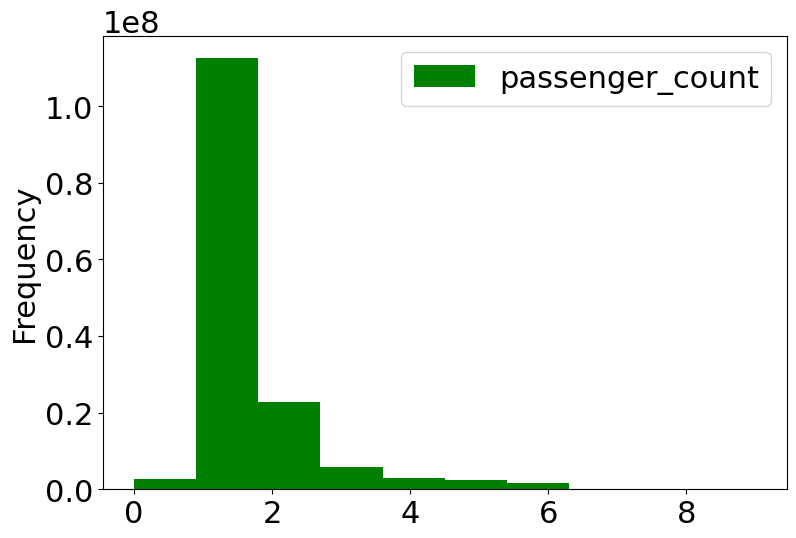

In [23]:
#Plot histograms of the continuous feature 
plt.figure()
plt.rcParams.update({'font.size': 22}) 
combine_raw[numeric_columns].plot(kind='hist', subplots=True, figsize=(30,20), layout=(3,3), sharex=False, sharey=False, color = 'green')
# plt.savefig('continuous_histograms.pdf')

passenger_count    Axes(0.125,0.77;0.168478x0.11)
dtype: object

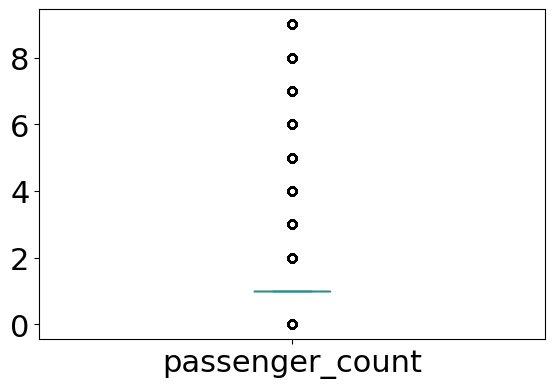

In [24]:
combine_raw[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(6,4), sharex=False, sharey=False)
# plt.savefig('continuous_boxplots.pdf')

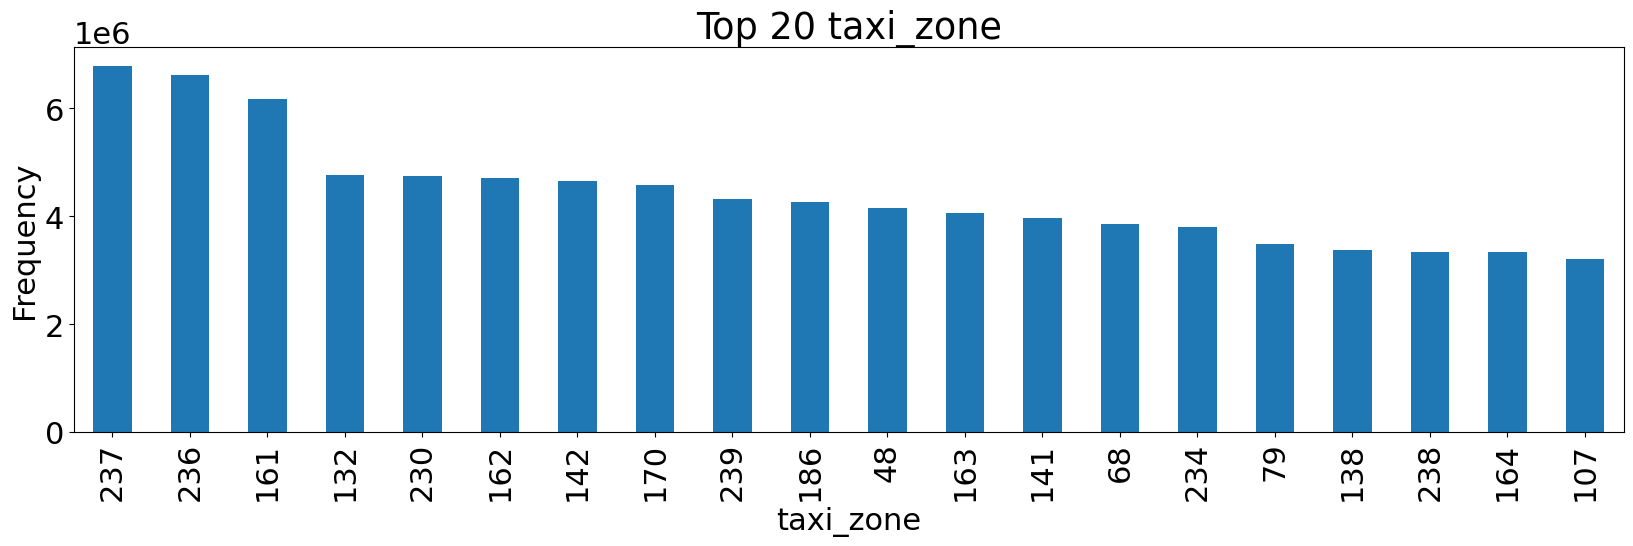

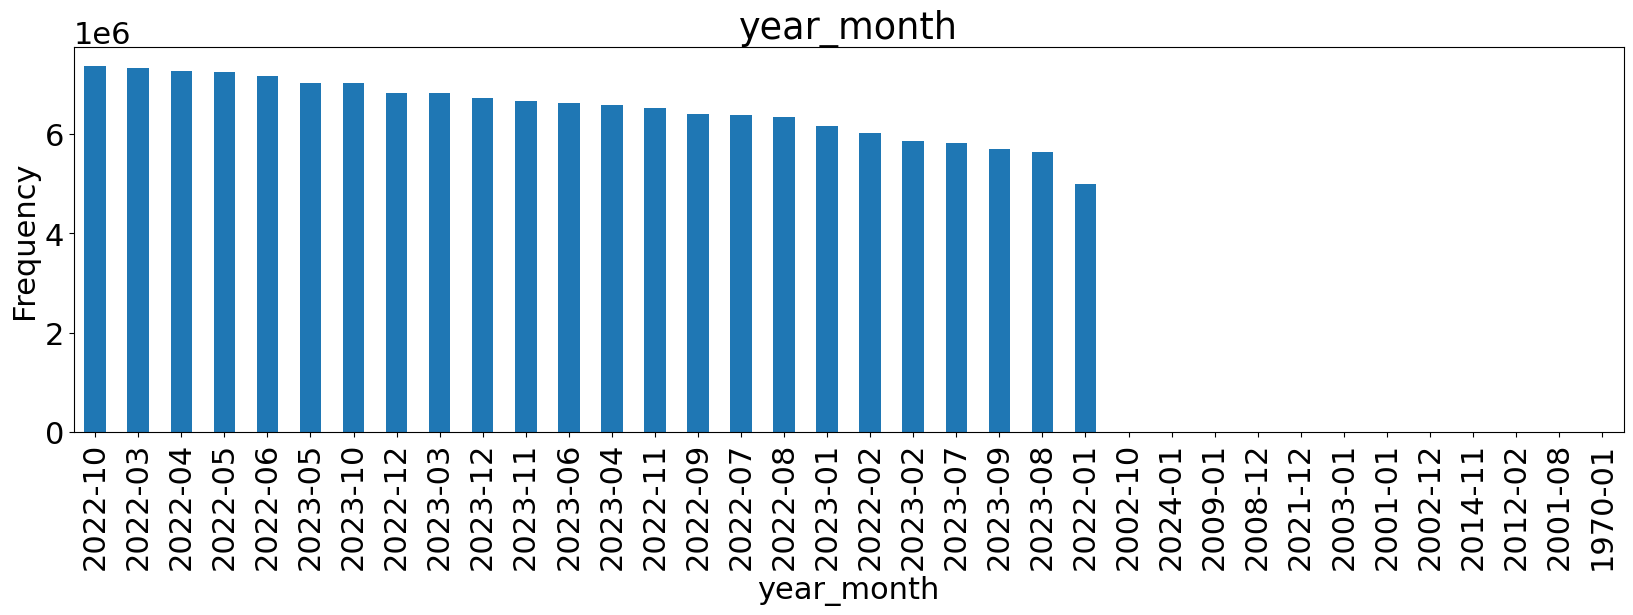

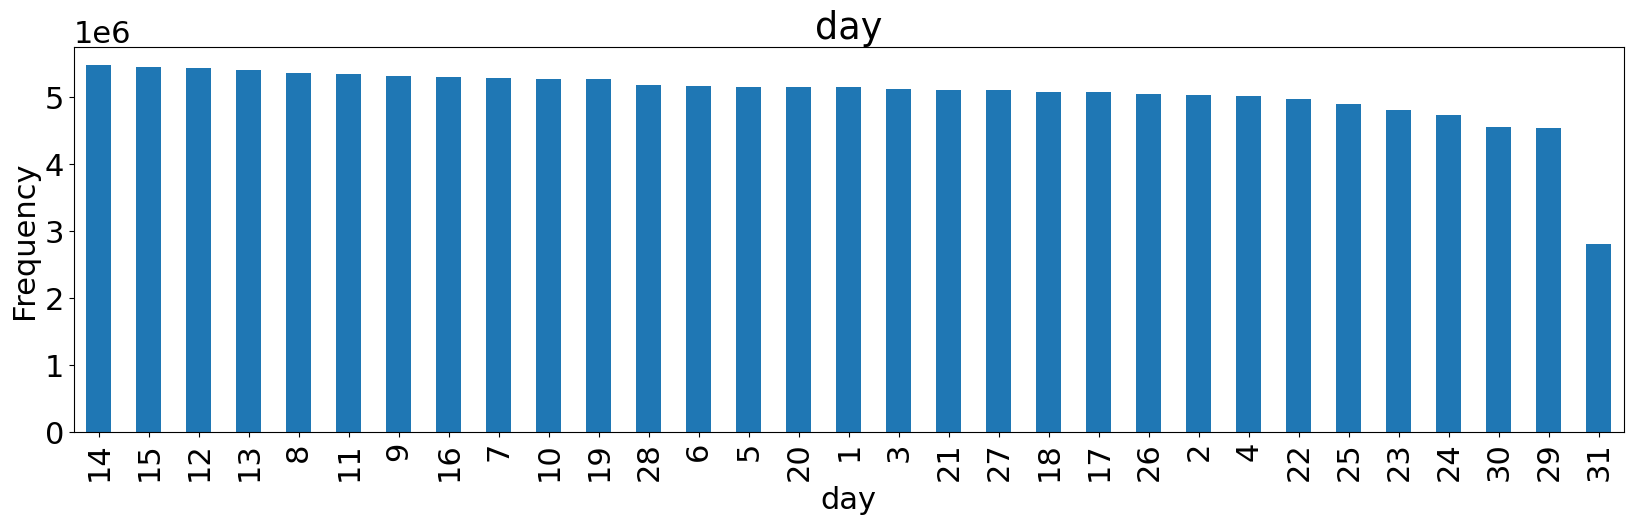

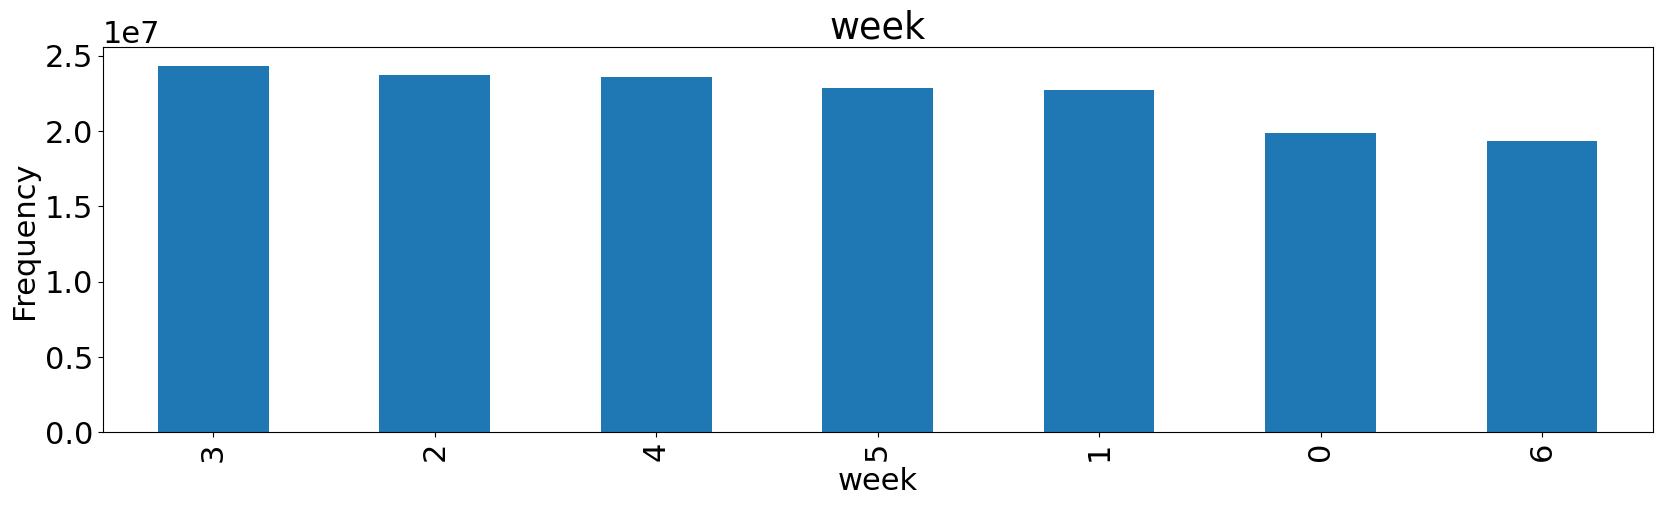

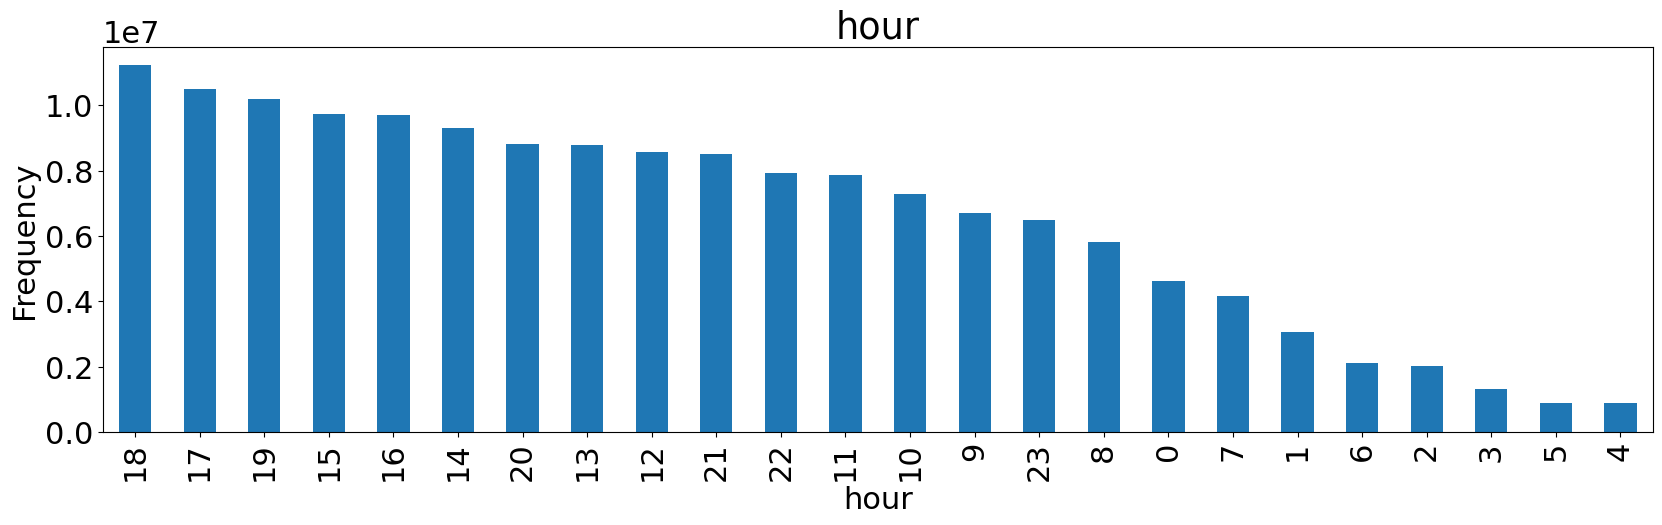

In [25]:
for col in category_columns:
    if col == 'taxi_zone':
        # Get the top 20 most frequent values for taxi_zone
        top_20 = combine_raw[col].value_counts().nlargest(20)
        # Plot the bar plot for the top 20
        f = top_20.plot(kind='bar', figsize=(20, 5))
        plt.title(f'Top 20 {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:
        # Plot the full distribution for other categorical columns
        f = combine_raw[col].value_counts().plot(kind='bar', figsize=(20, 5))
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.show()

# Replace null value with median

In [26]:
# replace missing value with reasonable estimate -- median.
median_case_passenger_count = combine_raw['passenger_count'].median()
median_case_passenger_count
combine_raw['passenger_count'] = combine_raw['passenger_count'].replace(np.nan, median_case_passenger_count)

In [27]:
# check the missing value, make sure there is no missing value.
missing_case_passenger_count = combine_raw[combine_raw['passenger_count'].isnull()]
missing_case_passenger_count

,datetime,passenger_count,taxi_zone,year_month,day,week,hour


## Replace "0" value with median

In [28]:
# check the rows of 0 value.
zero_value_case_passenger_count = combine_raw[combine_raw['passenger_count'] == 0]
zero_value_case_passenger_count

,datetime,passenger_count,taxi_zone,year_month,day,week,hour
143,2022-01-01 00:17:34,0.0,236,2022-01,1,5,0
144,2022-01-01 00:23:57,0.0,263,2022-01,1,5,0
145,2022-01-01 00:31:53,0.0,140,2022-01,1,5,0
146,2022-01-01 00:41:40,0.0,163,2022-01,1,5,0
157,2022-01-01 00:55:36,0.0,162,2022-01,1,5,0
...,...,...,...,...,...,...,...
58608,2023-12-31 15:30:46,0.0,65,2023-12,31,6,15
58700,2023-12-31 16:24:09,0.0,49,2023-12,31,6,16
58782,2023-12-31 18:15:09,0.0,177,2023-12,31,6,18
58886,2023-12-31 18:27:57,0.0,106,2023-12,31,6,18


In [29]:
combine_raw['passenger_count'] = combine_raw['passenger_count'].replace(0, median_case_passenger_count)

In [30]:
# check the rows of 0 value has been dropped.
zero_value_case_passenger_count = combine_raw[combine_raw['passenger_count'] == 0]
zero_value_case_passenger_count

,datetime,passenger_count,taxi_zone,year_month,day,week,hour


## Clean the rows outside valid range

In [31]:
# check the rows of month can't match.
month_list = ["2023-12", "2023-11", "2023-10", "2023-09", "2023-08", "2023-07", "2023-06", "2023-05", "2023-04", "2023-03", "2023-02", "2023-01", "2022-12", "2022-11","2022-10","2022-09", "2022-08", "2022-07",
             "2022-06","2022-05", "2022-04","2022-03","2022-02","2022-01",]
miss_match_case_month = combine_raw[~combine_raw['year_month'].isin(month_list)]

miss_match_case_month

,datetime,passenger_count,taxi_zone,year_month,day,week,hour
940,2021-12-31 23:52:28,1.0,238,2021-12,31,4,23
1028,2021-12-31 23:59:23,2.0,79,2021-12,31,4,23
1049,2021-12-31 23:57:54,1.0,148,2021-12,31,4,23
1290,2021-12-31 23:57:35,2.0,249,2021-12,31,4,23
1442,2021-12-31 23:58:55,1.0,137,2021-12,31,4,23
...,...,...,...,...,...,...,...
59108,2024-01-01 14:34:34,1.0,189,2024-01,1,0,14
59245,2024-01-01 00:01:13,1.0,82,2024-01,1,0,0
59268,2024-01-01 00:11:05,1.0,61,2024-01,1,0,0
59276,2024-01-01 00:00:10,1.0,42,2024-01,1,0,0


In [32]:
# drop miss match value rows.
combine_raw = combine_raw.drop(miss_match_case_month.index)

In [33]:
# check the rows of month can't match.
miss_match_case_month = combine_raw[~combine_raw['year_month'].isin(month_list)]
miss_match_case_month

,datetime,passenger_count,taxi_zone,year_month,day,week,hour


In [34]:
print("taxi_zone: ", combine_raw['taxi_zone'].unique().tolist(), "\n")
print("year_month: ", combine_raw['year_month'].unique().tolist(), "\n")
print("week: ", combine_raw['week'].unique().tolist(), "\n")
print("hour: ", combine_raw['hour'].unique().tolist(), "\n")
print("day: ", combine_raw['day'].unique().tolist(), "\n")
print("passenger_count: ", combine_raw['passenger_count'].unique().tolist(), "\n")

taxi_zone:  [142, 236, 166, 114, 68, 138, 233, 238, 234, 246, 43, 239, 148, 237, 7, 107, 263, 161, 79, 170, 162, 4, 262, 249, 132, 137, 90, 45, 70, 48, 211, 113, 164, 141, 50, 265, 88, 186, 144, 224, 95, 24, 158, 74, 140, 163, 75, 229, 209, 264, 219, 232, 151, 256, 231, 87, 116, 65, 188, 42, 13, 33, 41, 220, 146, 100, 261, 125, 127, 143, 243, 66, 260, 181, 195, 112, 129, 10, 226, 152, 25, 255, 244, 12, 168, 230, 189, 97, 82, 190, 52, 49, 61, 145, 223, 202, 228, 179, 36, 40, 159, 80, 17, 167, 208, 69, 254, 213, 193, 77, 37, 225, 171, 106, 93, 247, 165, 117, 212, 250, 14, 157, 198, 83, 169, 136, 217, 173, 123, 160, 3, 1, 76, 89, 22, 39, 86, 18, 28, 252, 227, 135, 91, 124, 38, 216, 119, 205, 81, 122, 194, 92, 133, 35, 134, 177, 215, 147, 248, 63, 47, 210, 197, 201, 131, 200, 56, 5, 130, 191, 85, 218, 51, 46, 149, 241, 139, 235, 71, 102, 62, 174, 72, 182, 11, 29, 183, 67, 155, 54, 196, 8, 175, 55, 53, 64, 180, 34, 60, 120, 44, 257, 78, 207, 184, 153, 185, 15, 19, 26, 258, 121, 57, 203, 101

In [35]:
combine_raw.dtypes

datetime           datetime64[us]
passenger_count           float64
taxi_zone                category
year_month               category
day                      category
week                     category
hour                     category
dtype: object

In [36]:
combine_raw

,datetime,passenger_count,taxi_zone,year_month,day,week,hour
0,2022-01-01 00:35:40,2.0,142,2022-01,1,5,0
1,2022-01-01 00:33:43,1.0,236,2022-01,1,5,0
2,2022-01-01 00:53:21,1.0,166,2022-01,1,5,0
3,2022-01-01 00:25:21,1.0,114,2022-01,1,5,0
4,2022-01-01 00:36:48,1.0,68,2022-01,1,5,0
...,...,...,...,...,...,...,...
64210,2023-12-31 22:35:00,1.0,37,2023-12,31,6,22
64211,2023-12-31 23:53:00,1.0,37,2023-12,31,6,23
64212,2023-12-31 23:33:00,1.0,80,2023-12,31,6,23
64213,2023-12-31 23:40:00,1.0,65,2023-12,31,6,23


## Group passenger_count together by the hour

In [37]:
# change the time into hour, ignore the minutes and seconds
combine_raw['datetime'] = combine_raw['datetime'].dt.floor('h')

In [38]:
df_grouped = combine_raw.groupby(['taxi_zone', 'datetime'])['passenger_count'].sum().reset_index()

C:\Users\simon\AppData\Local\Temp\ipykernel_12356\306043753.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = combine_raw.groupby(['taxi_zone', 'datetime'])['passenger_count'].sum().reset_index()


In [39]:
df_grouped

,taxi_zone,datetime,passenger_count
0,1,2022-01-01 00:00:00,0.0
1,1,2022-01-01 01:00:00,0.0
2,1,2022-01-01 02:00:00,2.0
3,1,2022-01-01 03:00:00,1.0
4,1,2022-01-01 04:00:00,8.0
...,...,...,...
4607755,265,2023-12-31 19:00:00,39.0
4607756,265,2023-12-31 20:00:00,26.0
4607757,265,2023-12-31 21:00:00,63.0
4607758,265,2023-12-31 22:00:00,79.0


In [40]:
# Extract year and month
df_grouped['year_month'] = df_grouped['datetime'].dt.to_period('M')

# Extract day of week (Monday=0, Sunday=6)
# df_grouped['day'] = df_grouped['datetime'].dt.day

# Extract day of week (Monday=0, Sunday=6)
df_grouped['Week'] = df_grouped['datetime'].dt.dayofweek

# Extract hour of the day
df_grouped['hour'] = df_grouped['datetime'].dt.hour

# days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
# combine_raw['week'] = combine_raw['week'].apply(lambda x: days[x])

df_grouped

,taxi_zone,datetime,passenger_count,year_month,Week,hour
0,1,2022-01-01 00:00:00,0.0,2022-01,5,0
1,1,2022-01-01 01:00:00,0.0,2022-01,5,1
2,1,2022-01-01 02:00:00,2.0,2022-01,5,2
3,1,2022-01-01 03:00:00,1.0,2022-01,5,3
4,1,2022-01-01 04:00:00,8.0,2022-01,5,4
...,...,...,...,...,...,...
4607755,265,2023-12-31 19:00:00,39.0,2023-12,6,19
4607756,265,2023-12-31 20:00:00,26.0,2023-12,6,20
4607757,265,2023-12-31 21:00:00,63.0,2023-12,6,21
4607758,265,2023-12-31 22:00:00,79.0,2023-12,6,22


## Add Geojson data with taxi_zones

<Axes: >

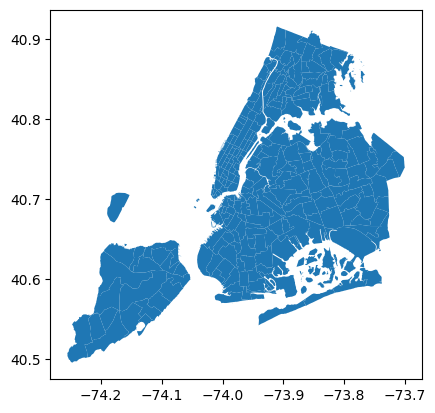

In [3]:
import geopandas as gpd
from shapely.geometry import Point

# Read the geojson file
geo_taxi_zone = gpd.read_file('NYC Taxi Zones.geojson')
geo_taxi_zone

# Plot the GeoDataFrame
geo_taxi_zone.plot()

In [42]:
# Convert to int
df_grouped['taxi_zone'] = df_grouped['taxi_zone'].astype(int)
geo_taxi_zone['objectid'] = geo_taxi_zone['objectid'].astype(int)

# Values in A but not in B
diff_A_B = set(df_grouped['taxi_zone']).difference(set(geo_taxi_zone['objectid']))
print(diff_A_B)

# Values in B but not in A
diff_B_A = set(geo_taxi_zone['objectid']).difference(set(df_grouped['taxi_zone']))
print(diff_B_A)

{264, 265}
{104, 103}


In [43]:
# Drop rows where 'taxi_zone' is 264 or 265
df_grouped = df_grouped.loc[(df_grouped['taxi_zone'] != 264) & (df_grouped['taxi_zone'] != 265)]
df_grouped

,taxi_zone,datetime,passenger_count,year_month,Week,hour
0,1,2022-01-01 00:00:00,0.0,2022-01,5,0
1,1,2022-01-01 01:00:00,0.0,2022-01,5,1
2,1,2022-01-01 02:00:00,2.0,2022-01,5,2
3,1,2022-01-01 03:00:00,1.0,2022-01,5,3
4,1,2022-01-01 04:00:00,8.0,2022-01,5,4
...,...,...,...,...,...,...
4572715,263,2023-12-31 19:00:00,520.0,2023-12,6,19
4572716,263,2023-12-31 20:00:00,462.0,2023-12,6,20
4572717,263,2023-12-31 21:00:00,554.0,2023-12,6,21
4572718,263,2023-12-31 22:00:00,398.0,2023-12,6,22


In [44]:
# Values in A but not in B
diff_A_B = set(df_grouped['taxi_zone']).difference(set(geo_taxi_zone['objectid']))
print(diff_A_B)

set()


## Feature Eng: Add ZIP and borough feature

In [45]:
df_add_borough = df_grouped.merge(geo_taxi_zone[['objectid', 'borough']], 
                               left_on='taxi_zone', 
                               right_on='objectid', 
                               how='left')

# Now, drop the 'objectid' column if it's not needed
df_add_borough.drop('objectid', axis=1, inplace=True)

In [46]:
df_add_borough

,taxi_zone,datetime,passenger_count,year_month,Week,hour,borough
0,1,2022-01-01 00:00:00,0.0,2022-01,5,0,EWR
1,1,2022-01-01 01:00:00,0.0,2022-01,5,1,EWR
2,1,2022-01-01 02:00:00,2.0,2022-01,5,2,EWR
3,1,2022-01-01 03:00:00,1.0,2022-01,5,3,EWR
4,1,2022-01-01 04:00:00,8.0,2022-01,5,4,EWR
...,...,...,...,...,...,...,...
4572715,263,2023-12-31 19:00:00,520.0,2023-12,6,19,Manhattan
4572716,263,2023-12-31 20:00:00,462.0,2023-12,6,20,Manhattan
4572717,263,2023-12-31 21:00:00,554.0,2023-12,6,21,Manhattan
4572718,263,2023-12-31 22:00:00,398.0,2023-12,6,22,Manhattan


In [47]:
zip_codes = gpd.read_file('cb_2018_us_zcta510_500k')

# Ensure same coordinate reference system (CRS)
geo_taxi_zone = geo_taxi_zone.to_crs(epsg=4326)
zip_codes = zip_codes.to_crs(epsg=4326)

# Spatial join to map each taxi zone to the corresponding ZIP code
taxi_zones_with_zip = gpd.sjoin(geo_taxi_zone, zip_codes, how='left', predicate='intersects')

In [48]:
# Aggregate ZIP codes into a list for each taxi zone
aggregated_zip_codes = taxi_zones_with_zip.groupby('objectid')['ZCTA5CE10'].agg(list).reset_index()

# Rename the ZIP code column 
aggregated_zip_codes = aggregated_zip_codes.rename(columns={'ZCTA5CE10': 'zip_codes'})


In [49]:
# Merge with df_add_borough
df_add_borough_zip = df_add_borough.merge(
    aggregated_zip_codes, 
    left_on='taxi_zone', 
    right_on='objectid', 
    how='left'
)

# Drop the 'objectid' column 
df_add_borough_zip.drop('objectid', axis=1, inplace=True)

In [50]:
df_add_borough_zip

,taxi_zone,datetime,passenger_count,year_month,Week,hour,borough,zip_codes
0,1,2022-01-01 00:00:00,0.0,2022-01,5,0,EWR,"[07201, 07114]"
1,1,2022-01-01 01:00:00,0.0,2022-01,5,1,EWR,"[07201, 07114]"
2,1,2022-01-01 02:00:00,2.0,2022-01,5,2,EWR,"[07201, 07114]"
3,1,2022-01-01 03:00:00,1.0,2022-01,5,3,EWR,"[07201, 07114]"
4,1,2022-01-01 04:00:00,8.0,2022-01,5,4,EWR,"[07201, 07114]"
...,...,...,...,...,...,...,...,...
4572715,263,2023-12-31 19:00:00,520.0,2023-12,6,19,Manhattan,"[10075, 10028, 10128]"
4572716,263,2023-12-31 20:00:00,462.0,2023-12,6,20,Manhattan,"[10075, 10028, 10128]"
4572717,263,2023-12-31 21:00:00,554.0,2023-12,6,21,Manhattan,"[10075, 10028, 10128]"
4572718,263,2023-12-31 22:00:00,398.0,2023-12,6,22,Manhattan,"[10075, 10028, 10128]"


In [51]:
print("borough: ", df_add_borough['borough'].unique().tolist(), "\n")

borough:  ['EWR', 'Queens', 'Bronx', 'Manhattan', 'Staten Island', 'Brooklyn'] 



In [57]:
# Flatten the list of lists of ZIP codes into a single list
all_zip_codes = [zip_code for sublist in df_add_borough_zip['zip_codes'] for zip_code in sublist]

# Get unique ZIP codes
unique_zip_codes = list(set(all_zip_codes))

In [58]:
# Print all unique ZIP codes and their count
print(f"Unique ZIP codes ({len(unique_zip_codes)}): ", unique_zip_codes)

# Print the number of unique taxi zones
unique_taxi_zones = df_add_borough_zip['taxi_zone'].nunique()
print(f"Unique taxi zones: {unique_taxi_zones}")

Unique ZIP codes (225):  ['10006', '10162', '10012', '11209', '10460', '11214', '10001', '10459', '11427', '11236', '10280', '11428', '10028', '10168', '11693', '11104', '11205', '10310', '10301', '10302', '10306', '11357', '10009', '11412', '11234', '11229', '10308', '10454', '11225', '10021', '11042', '11436', '11210', '10115', '11375', '11417', '11004', '10704', '10456', '11415', '10018', '11021', '11219', '11217', '11369', '11222', '10705', '11102', '10024', '11697', '11367', '11220', '11434', '11365', '10013', '10461', '10304', '11203', '10022', '11692', '11003', '11421', '10152', '10470', '11358', '11215', '11368', '10465', '10075', '10463', '10110', '11435', '11206', '11103', '10469', '11364', '10005', '11239', '11416', '11694', '10033', '11432', '11371', '10025', '10451', '11101', '10167', '11430', '10037', '11360', '10010', '11355', '10312', '11223', '10464', '11096', '11235', '11418', '10453', '11218', '11216', '10029', '11559', '11356', '10111', '10278', '11581', '10038', '1

In [56]:
# Drop rows where the borough is "EWR"
df_add_borough_zip = df_add_borough_zip[df_add_borough_zip['borough'] != 'EWR']

In [55]:
df_add_borough_zip

,taxi_zone,datetime,passenger_count,year_month,Week,hour,borough,zip_codes
17520,2,2022-01-01 00:00:00,0.0,2022-01,5,0,Queens,"[11693, 11430]"
17521,2,2022-01-01 01:00:00,0.0,2022-01,5,1,Queens,"[11693, 11430]"
17522,2,2022-01-01 02:00:00,0.0,2022-01,5,2,Queens,"[11693, 11430]"
17523,2,2022-01-01 03:00:00,0.0,2022-01,5,3,Queens,"[11693, 11430]"
17524,2,2022-01-01 04:00:00,0.0,2022-01,5,4,Queens,"[11693, 11430]"
...,...,...,...,...,...,...,...,...
4572715,263,2023-12-31 19:00:00,520.0,2023-12,6,19,Manhattan,"[10075, 10028, 10128]"
4572716,263,2023-12-31 20:00:00,462.0,2023-12,6,20,Manhattan,"[10075, 10028, 10128]"
4572717,263,2023-12-31 21:00:00,554.0,2023-12,6,21,Manhattan,"[10075, 10028, 10128]"
4572718,263,2023-12-31 22:00:00,398.0,2023-12,6,22,Manhattan,"[10075, 10028, 10128]"


In [59]:
# Print all unique ZIP codes and their count
print(f"Unique ZIP codes ({len(unique_zip_codes)}): ", unique_zip_codes)

# Print the number of unique taxi zones
unique_taxi_zones = df_add_borough_zip['taxi_zone'].nunique()
print(f"Unique taxi zones: {unique_taxi_zones}")

Unique ZIP codes (225):  ['10006', '10162', '10012', '11209', '10460', '11214', '10001', '10459', '11427', '11236', '10280', '11428', '10028', '10168', '11693', '11104', '11205', '10310', '10301', '10302', '10306', '11357', '10009', '11412', '11234', '11229', '10308', '10454', '11225', '10021', '11042', '11436', '11210', '10115', '11375', '11417', '11004', '10704', '10456', '11415', '10018', '11021', '11219', '11217', '11369', '11222', '10705', '11102', '10024', '11697', '11367', '11220', '11434', '11365', '10013', '10461', '10304', '11203', '10022', '11692', '11003', '11421', '10152', '10470', '11358', '11215', '11368', '10465', '10075', '10463', '10110', '11435', '11206', '11103', '10469', '11364', '10005', '11239', '11416', '11694', '10033', '11432', '11371', '10025', '10451', '11101', '10167', '11430', '10037', '11360', '10010', '11355', '10312', '11223', '10464', '11096', '11235', '11418', '10453', '11218', '11216', '10029', '11559', '11356', '10111', '10278', '11581', '10038', '1

In [60]:
df_add_borough_zip.reset_index(drop=True).to_parquet("clean_taxi_data.parquet", index=False)

In [61]:
df = pd.read_parquet("clean_taxi_data.parquet")
df

,taxi_zone,datetime,passenger_count,year_month,Week,hour,borough,zip_codes
0,2,2022-01-01 00:00:00,0.0,2022-01,5,0,Queens,"[11693, 11430]"
1,2,2022-01-01 01:00:00,0.0,2022-01,5,1,Queens,"[11693, 11430]"
2,2,2022-01-01 02:00:00,0.0,2022-01,5,2,Queens,"[11693, 11430]"
3,2,2022-01-01 03:00:00,0.0,2022-01,5,3,Queens,"[11693, 11430]"
4,2,2022-01-01 04:00:00,0.0,2022-01,5,4,Queens,"[11693, 11430]"
...,...,...,...,...,...,...,...,...
4555195,263,2023-12-31 19:00:00,520.0,2023-12,6,19,Manhattan,"[10075, 10028, 10128]"
4555196,263,2023-12-31 20:00:00,462.0,2023-12,6,20,Manhattan,"[10075, 10028, 10128]"
4555197,263,2023-12-31 21:00:00,554.0,2023-12,6,21,Manhattan,"[10075, 10028, 10128]"
4555198,263,2023-12-31 22:00:00,398.0,2023-12,6,22,Manhattan,"[10075, 10028, 10128]"


In [62]:
pd.set_option('display.float_format', '{:.2f}'.format)

print(df['passenger_count'].describe())

count   4555200.00
mean         46.99
std         128.35
min           0.00
25%           0.00
50%           2.00
75%          14.00
max        2316.00
Name: passenger_count, dtype: float64
